### 01. Import Dependecies

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


### 02. Load PCA features

In [8]:

#data_path = '../data/PCA__components.csv'
data_path = '../data/TSNE_components.csv'
df_pca = pd.read_csv(data_path)
df_pca.head()


,PC1,PC2,PC3
0,-14.711916,11.745303,20.229320
1,-32.228270,-9.460072,10.497274
2,-14.652037,-18.224024,-17.449625
3,16.355503,20.072386,4.904910
4,25.285778,0.121993,17.794727


### 03. Determine optimal k (Elbow method)

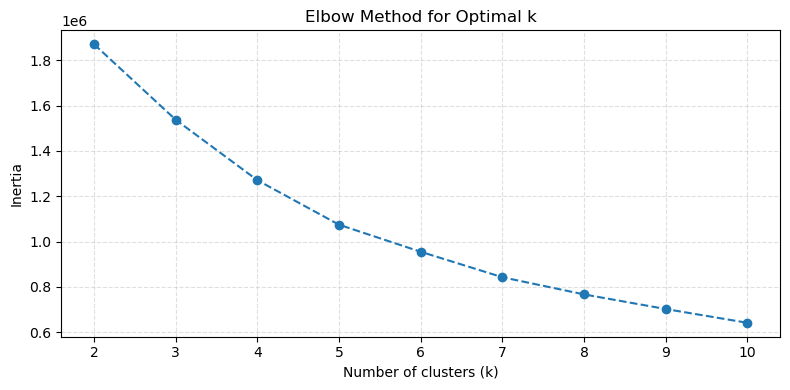

In [9]:

K = range(2, 11)
inertias = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertias, marker='o', linestyle='--')
plt.xticks(K)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 04. Evaluate using silhouette score

Silhouette scores: {2: np.float64(0.323), 3: np.float64(0.269), 4: np.float64(0.264), 5: np.float64(0.272), 6: np.float64(0.261), 7: np.float64(0.267), 8: np.float64(0.263), 9: np.float64(0.265), 10: np.float64(0.268)}
Best k by silhouette score: 2


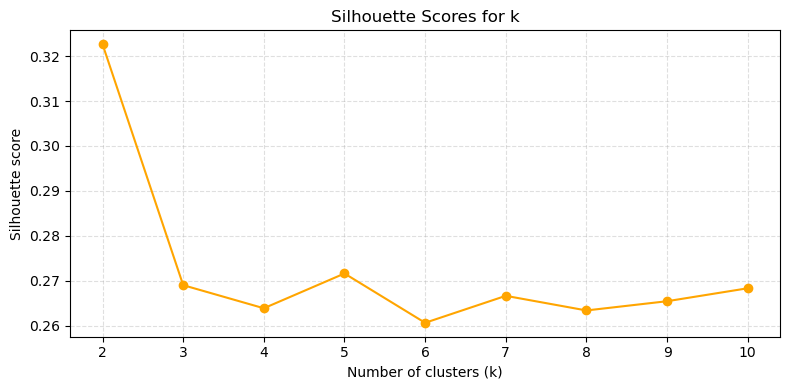

In [10]:

silhouette_scores = []
for k in K:
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(df_pca)
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)

best_k = K[np.argmax(silhouette_scores)]
print('Silhouette scores:', dict(zip(K, np.round(silhouette_scores, 3))))
print(f'Best k by silhouette score: {best_k}')

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.xticks(K)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scores for k')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 05. Fit final KMeans model

In [11]:

final_kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(df_pca)

df_clusters = df_pca.copy()
df_clusters['cluster'] = cluster_labels

df_clusters['cluster'].value_counts().sort_index()


cluster
0    2121
1    2264
Name: count, dtype: int64

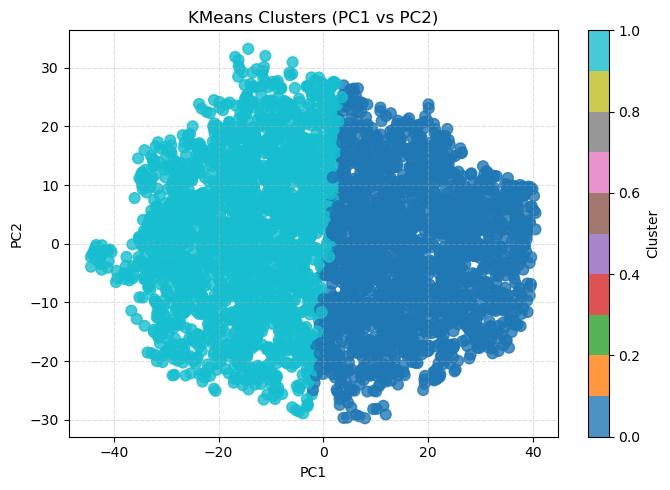

In [12]:
# 06. Visualize clusters in reduced dimensional space
plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    df_clusters['PC1'],
    df_clusters['PC2'],
    c=df_clusters['cluster'],
    cmap='tab10',
    s=60,
    alpha=0.8,
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters (PC1 vs PC2)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()
